In [ ]:
# Modelación del aprendizaje con inteligencia artificial (Gpo 101)
# Equipo 2
# Sebastián Miramontes Soto A01285296
# Raul Correa Ocañas A01722401
# Ericka Sofía Rodriguez Sanchez A01571463

In [ ]:
import pandas as pd
import random

In [ ]:
# Prepara Google Colab para acceder a datos en Google Drive (mount)
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Guarda en un dataframe el contenido del dataset titanic
credit = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/TC2034.101/data/Credit_card.csv')
credit_labels = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/TC2034.101/data/Credit_card_label.csv')

credit = pd.concat([credit, credit_labels], axis=1)

print("Approved", credit.label.sum())
print("Denied", len(credit) - credit.label.sum())

Approved 175
Denied 1373


In [ ]:
for column in credit.columns:
  print(column, ":", credit[column].isna().sum())

Ind_ID : Ind_ID    0
Ind_ID    0
dtype: int64
GENDER : 7
Car_Owner : 0
Propert_Owner : 0
CHILDREN : 0
Annual_income : 23
Type_Income : 0
EDUCATION : 0
Marital_status : 0
Housing_type : 0
Birthday_count : 22
Employed_days : 0
Mobile_phone : 0
Work_Phone : 0
Phone : 0
EMAIL_ID : 0
Type_Occupation : 488
Family_Members : 0
Ind_ID : Ind_ID    0
Ind_ID    0
dtype: int64
label : 0


In [ ]:
features = ['Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Family_Members']

# features = ['CHILDREN', 'EDUCATION', 'EMAIL_ID', 'GENDER']

X = credit[features]
X.head()

,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members
0,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,2
1,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2
2,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,2
3,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2
4,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,2


In [ ]:
for column in X.columns:
  todrop = X.loc[credit[column].isna()].index
  X.drop(todrop, inplace=True)
  X[column].unique()

<ipython-input-398-a94d95718e55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(todrop, inplace=True)


In [ ]:
# for column in X.columns:
#   print(X[column].unique())

In [ ]:
X = pd.get_dummies(X)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = X.columns)

y = credit['label'].loc[X.index]

In [ ]:
approved_index = y[y == 1].index
denied_index = y[y == 0].index

denied_index = denied_index[random.sample(range(len(y)-y.sum()), y.sum())]

sample_index = pd.Index.union(approved_index, denied_index)
X = X.loc[sample_index]
y = y.loc[sample_index]

print("Approved", y.sum())
print("Denied", len(y) - y.sum())

Approved 175
Denied 175


In [ ]:
display(X.head())
display(y.head())

,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y,Type_Income_Commercial associate,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
0,0.0,0.094891,0.358100,1.000000,0.071429,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.182482,0.660577,0.037621,0.071429,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.182482,0.660577,0.037621,0.071429,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.182482,0.660577,0.037621,0.071429,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.182482,0.660577,0.037621,0.071429,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)



print("Original set")
print("Approved", y.sum())
print("Denied", len(y)-y.sum())

print()

print("Train set")
print("Approved", y_train.sum())
print("Denied", len(y_train)-y_train.sum())

print()

print("Test set")
print("Approved", y_test.sum())
print("Denied", len(y_test)-y_test.sum())

Original set
Approved 175
Denied 175

Train set
Approved 151
Denied 146

Test set
Approved 24
Denied 29


In [ ]:
print((X_train.index == y_train.index).sum())
print((X_test.index == y_test.index).sum())

297
53


In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[16, 13],
       [13, 11]])

Text(0.5, 427.9555555555555, 'Predicted label')

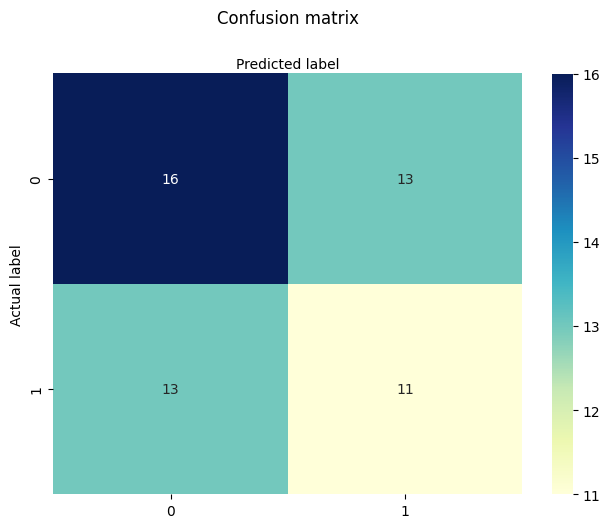

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

In [ ]:
from sklearn.metrics import classification_report
target_names = ['DENIED', 'APPROVED']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      DENIED       0.55      0.55      0.55        29
    APPROVED       0.46      0.46      0.46        24

    accuracy                           0.51        53
   macro avg       0.51      0.51      0.51        53
weighted avg       0.51      0.51      0.51        53



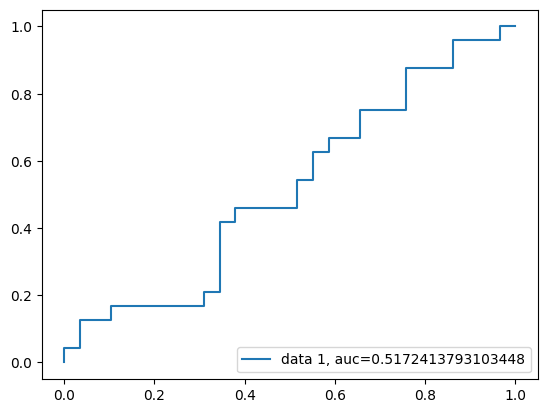

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

En esta notebook, abordamos la problemática de modelar la aprobación o denegación de tarjetas de crédito utilizando aprendizaje automático. Comenzamos importando las bibliotecas necesarias y montando Google Drive para acceder a los datos. Utilizamos Pandas para cargar el conjunto de datos y realizamos algunas operaciones exploratorias, como verificar los valores perdidos en las columnas y eliminar las filas con valores perdidos.

Luego, seleccionamos un conjunto de características relevantes y lo codificamos utilizando one-hot encoding para las variables categóricas. Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba y procedimos a entrenar un modelo de regresión logística. Utilizamos las métricas de la matriz de confusión para evaluar el rendimiento del modelo en el conjunto de prueba.

En cuanto a nuestras elecciones, optamos por un enfoque simple pero efectivo para la clasificación binaria utilizando regresión logística. Podríamos haber explorado otros algoritmos de clasificación para comparar y mejorar el rendimiento del modelo. Además, podríamos haber realizado una búsqueda de hiper parámetros para optimizar la configuración del modelo.

En cuanto a nuestra experiencia, enfrentamos desafíos al comprender y modificar el tutorial, especialmente si éramos nuevos en el aprendizaje automático y en el uso de herramientas como Google Colab. Sin embargo, la capacidad de colaborar en línea y acceder a recursos compartidos facilitó el proceso de aprendizaje y resolución de problemas.


Los resultados obtenidos muestran que se podría encontrar un modelo mas adecuado para el caso con el conjunto de datos que se tiene. Esto se obserba en la matriz de confusión, presentando diferencias muy pequeñas entre los casos falsos y verdaderos. Además, en la última gráfica se observa que la línea está muy cerca del 0.5, lo que quiere decir que es más probable que se trate de una predicción aleatoria.Sin embargo, para obtener una evaluación más completa del modelo, podríamos considerar más métricas de evaluación.